In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# !pip install --quiet shap==0.39.0
#import shap

%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [148]:
#pip install --quiet shap==0.39.0

In [149]:
df=pd.read_csv("RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [150]:
df.shape

(12316, 32)

In [151]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [152]:
# renaming columns
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map,inplace=True)

In [153]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

# date (day-month-year) time
df['time'].dt.hour

0        17
1        17
2        17
3         1
4         1
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: time, Length: 12316, dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time                     12316 non-null  datetime64[ns]
 1   day_of_week              12316 non-null  object        
 2   driver_age               12316 non-null  object        
 3   driver_sex               12316 non-null  object        
 4   educational_level        11575 non-null  object        
 5   vehicle_driver_relation  11737 non-null  object        
 6   driving_experience       11487 non-null  object        
 7   vehicle_type             11366 non-null  object        
 8   vehicle_owner            11834 non-null  object        
 9   service_year             8388 non-null   object        
 10  vehicle_defect           7889 non-null   object        
 11  accident_area            12077 non-null  object        
 12  lanes                    11931 n

In [155]:
df.describe(include=['O']).T

,count,unique,top,freq
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883
vehicle_defect,7889,3,No defect,7777


In [156]:
df.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [157]:
df.isna().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [158]:
print("Number of duplicates:",df.duplicated().sum())
print("\n")
print("Unique values per column:\n", df.nunique())

Number of duplicates: 0


Unique values per column:
 time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement

In [159]:
# extracting hour and minute from timestamp
df['hour']=df['time'].dt.hour
df['minute']=df['time'].dt.minute
df.drop('time',axis=1,inplace=True)

In [160]:
df.head().T

,0,1,2,3,4
day_of_week,Monday,Monday,Monday,Sunday,Sunday
driver_age,18-30,31-50,18-30,18-30,18-30
driver_sex,Male,Male,Male,Male,Male
educational_level,Above high school,Junior high school,Junior high school,Junior high school,Junior high school
vehicle_driver_relation,Employee,Employee,Employee,Employee,Employee
driving_experience,1-2yr,Above 10yr,1-2yr,5-10yr,2-5yr
vehicle_type,Automobile,Public (> 45 seats),Lorry (41?100Q),Public (> 45 seats),NaN
vehicle_owner,Owner,Owner,Owner,Governmental,Owner
service_year,Above 10yr,5-10yrs,NaN,NaN,5-10yrs
vehicle_defect,No defect,No defect,No defect,No defect,No defect


In [161]:
df["accident_severity"].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [162]:
list(df["accident_severity"].unique())

['Slight Injury', 'Serious Injury', 'Fatal injury']

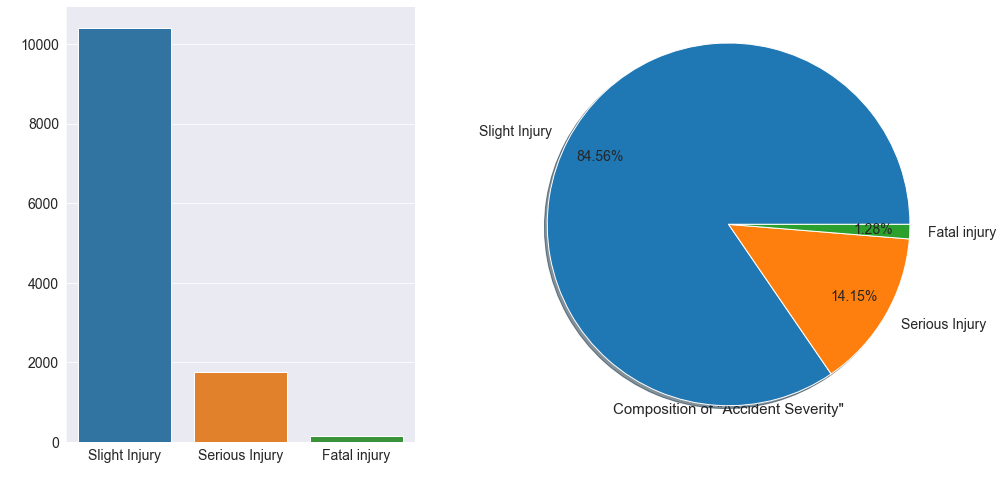

In [163]:
plt.figure(figsize=(15,8))
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df['accident_severity'])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

ax2 = plt.subplot(1,2,2)
plt.pie(df['accident_severity'].value_counts(),
       labels=list(df['accident_severity'].unique()),
       autopct='%1.2f%%',
       pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15)
plt.subplots_adjust(wspace=0.4)
plt.show()

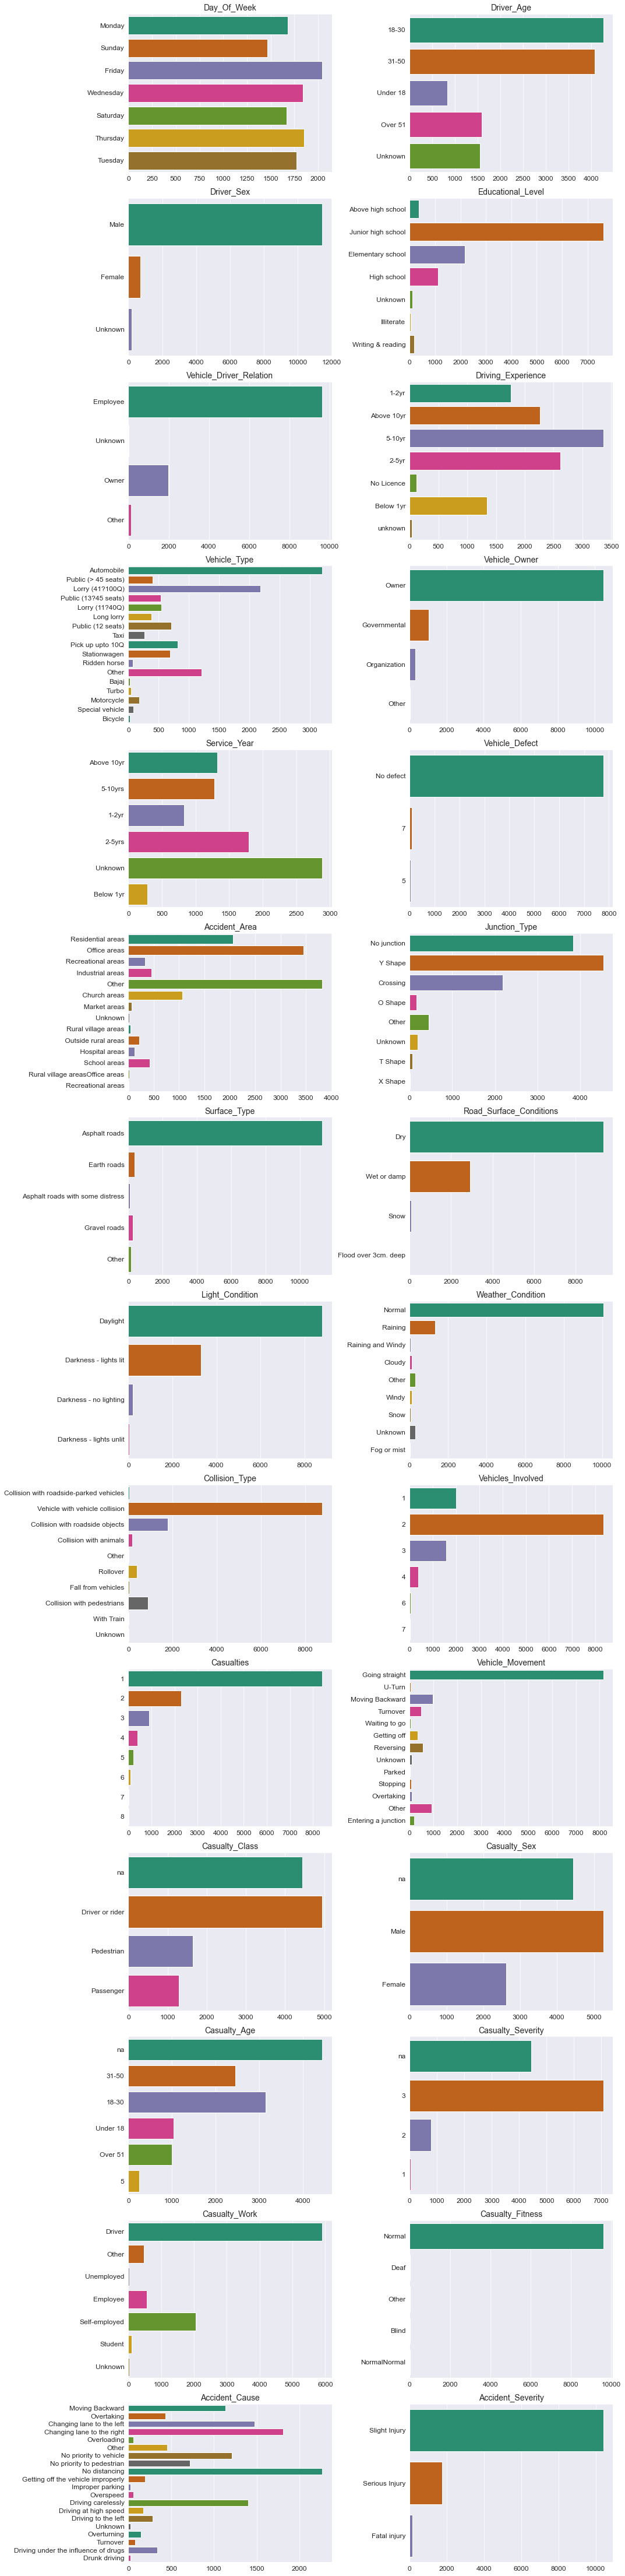

In [164]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

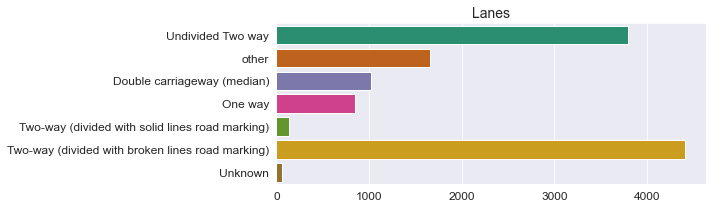

In [165]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

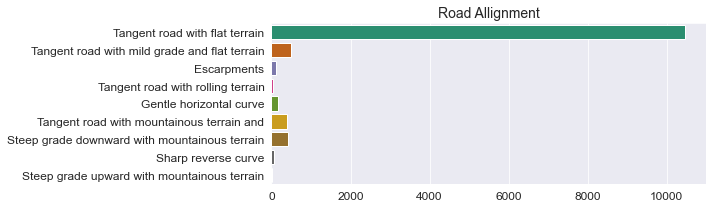

In [166]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

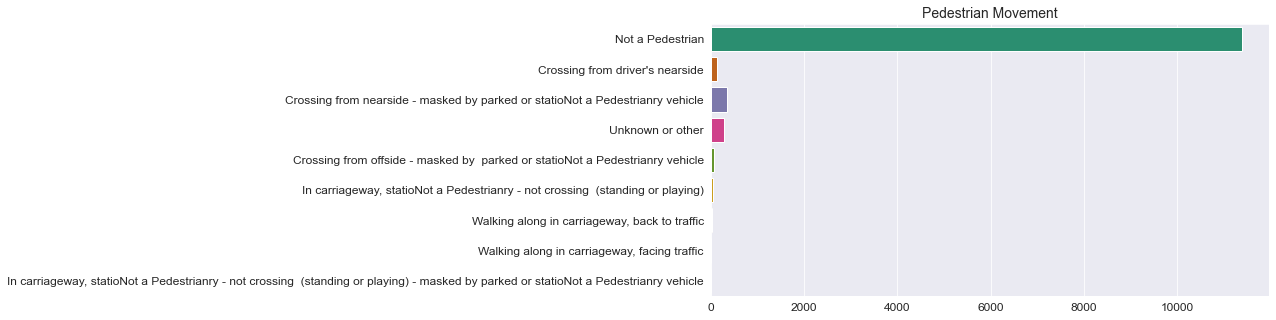

In [167]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

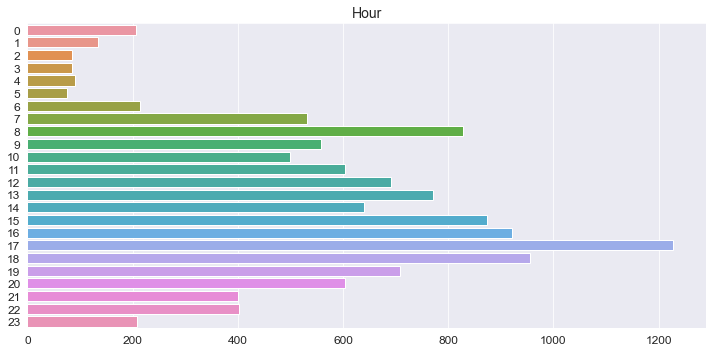

In [168]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

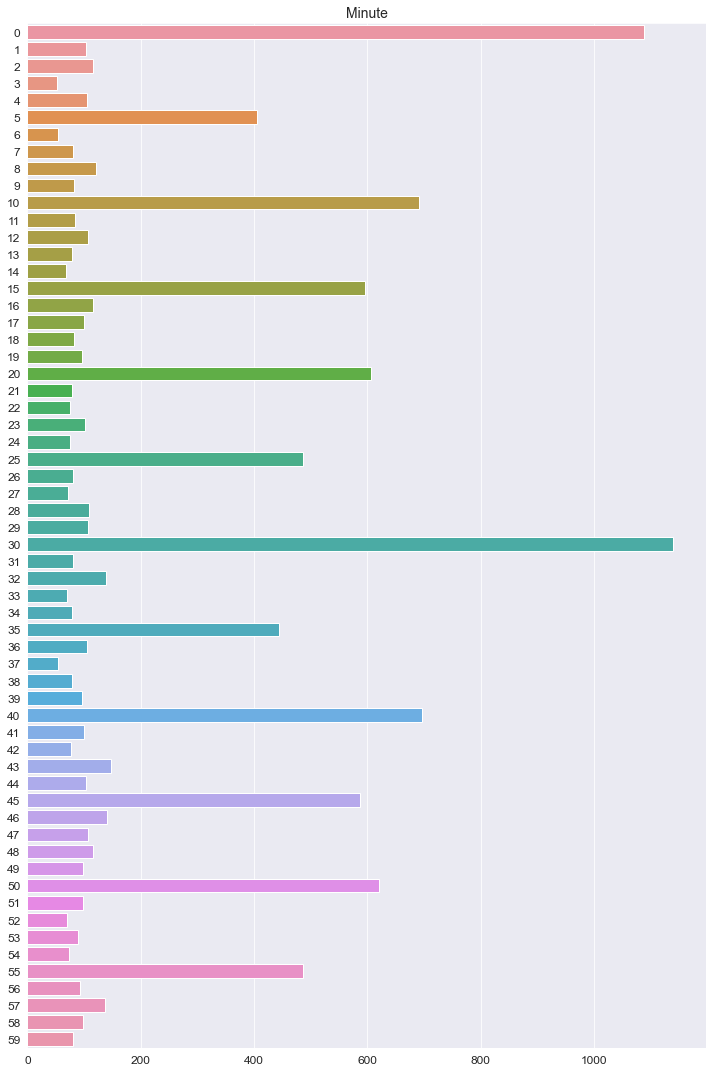

In [169]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [170]:
minutes = list(range(5,56,5))
def convert_minutes(x: int):
    for m in minutes:
        if x % m == x and x> m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in minutes+[0]:
            return x

In [171]:
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

<AxesSubplot:xlabel='count', ylabel='minute'>

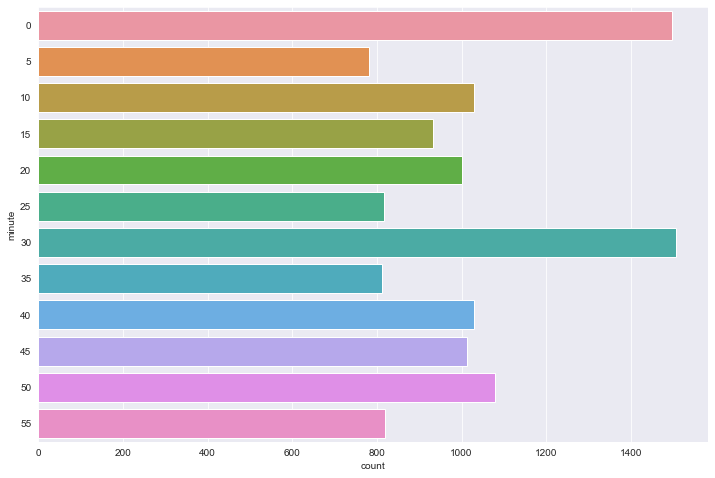

In [172]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='minute')

In [173]:
# dropping minutes
df.drop('minute', axis=1, inplace=True)

In [174]:
num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols]

,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Preprocessing

In [175]:
df.isna().sum()[df.isna().sum() != 0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
collision_type              155
vehicle_movement            308
casualty_work              3198
casualty_fitness           2635
dtype: int64

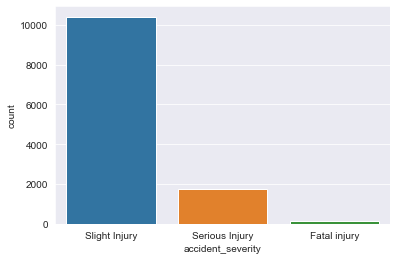

In [176]:
ax = sns.countplot(x=df["accident_severity"])
plt.show()

In [177]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness',], inplace=True)

In [178]:
imputeCols =[x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in imputeCols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [179]:
df.isna().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
dtype: int64

## Encoding

In [180]:
# Performing label encoding manually for the given features
def ordinal_encoder(df, feats):
    for feat in feats:
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df
df = ordinal_encoder(df,df.drop(['accident_severity'], axis=1).columns)
df.shape

(12316, 28)

In [181]:
def ordinal_encoder(df,feats):
    for feat in feats:
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df
df = ordinal_encoder(df,df.drop(['accident_severity'], axis = 1).columns)
df.shape

(12316, 28)

In [182]:
df.head()

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour
0,1,0,1,0,0,0,3,3,9,2,5,1,0,0,3,2,3,1,1,2,3,2,5,3,5,9,Slight Injury,17
1,1,1,1,4,3,11,3,2,6,4,5,1,0,0,3,2,8,1,1,2,3,2,5,3,5,16,Slight Injury,17
2,1,0,1,4,0,5,3,5,1,6,5,1,0,0,3,2,2,1,1,2,0,1,1,2,5,0,Serious Injury,17
3,3,0,1,4,2,11,0,5,6,6,6,7,2,0,0,2,8,1,1,2,2,0,0,2,5,1,Slight Injury,1
4,3,0,1,4,1,0,3,2,4,6,5,7,0,0,0,2,8,1,1,2,3,2,5,3,5,16,Slight Injury,1


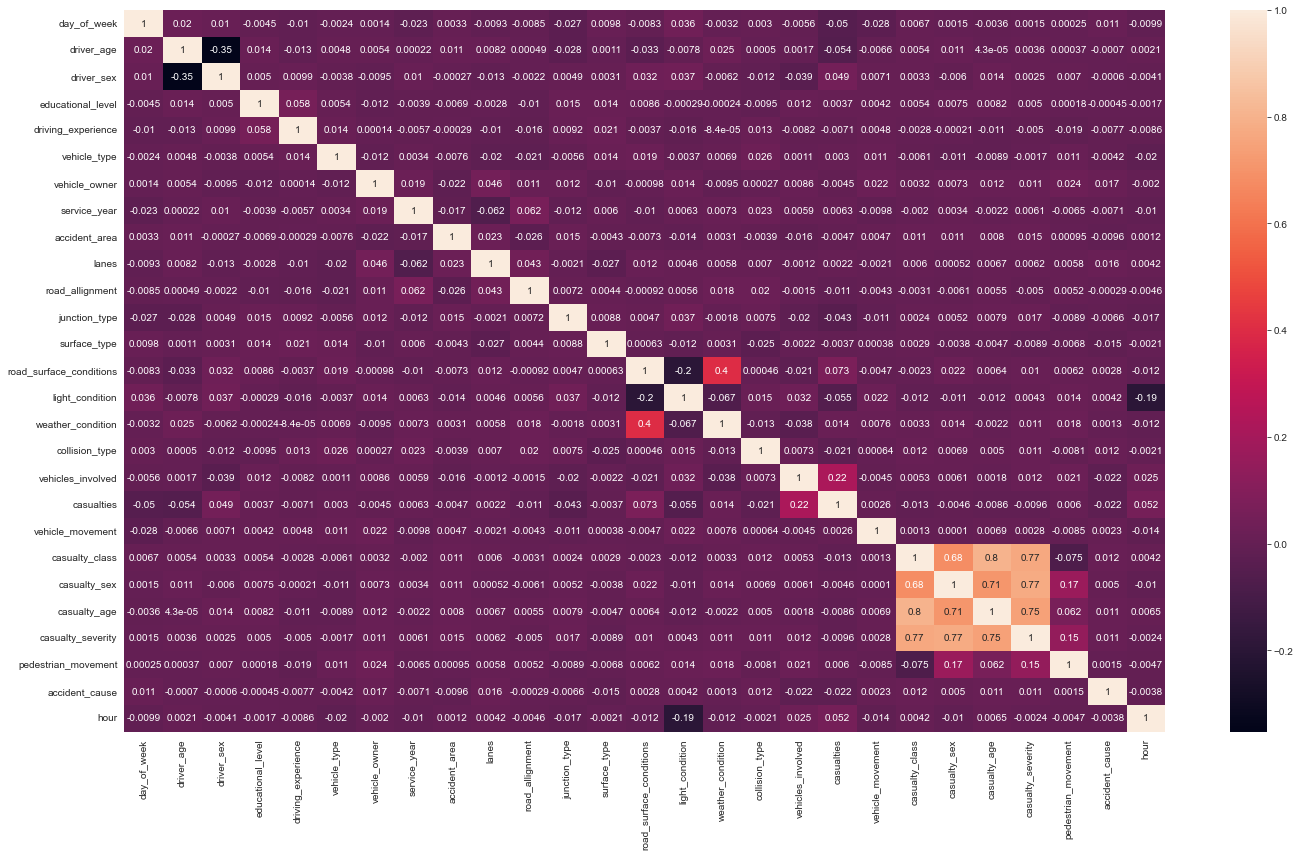

In [183]:
# constructing heatmap with only continuous variables
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

## Upsampling

In [184]:
X = df.drop('accident_severity', axis=1)
Y = df['accident_severity']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 27) (3695, 27) (8621,) (3695,)


In [186]:
counter = Counter(y_train)
print("******************************")

for value, count in counter.items():
    percentage = 100*count/len(y_train)
    print(f"Class= {value}, n={count} ({percentage: .2f}%)")
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)
    
counter = Counter(y_train)

print("******************************")

for value, count in counter.items():
    percentage = 100*count/len(y_train)
    print(f"Class = {value}, n={count} ({percentage: .2f}%)")

print("******************************")

print("Unsampled data shape:", X_train.shape, y_train.shape)


******************************
Class= Slight Injury, n=7324 ( 84.96%)
Class= Serious Injury, n=1191 ( 13.82%)
Class= Fatal injury, n=106 ( 1.23%)
******************************
Class = Slight Injury, n=7324 ( 33.33%)
Class = Serious Injury, n=7324 ( 33.33%)
Class = Fatal injury, n=7324 ( 33.33%)
******************************
Unsampled data shape: (21972, 27) (21972,)


In [187]:
y_test

4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
              ...      
9855      Slight Injury
7302     Serious Injury
9023      Slight Injury
7936      Slight Injury
438       Slight Injury
Name: accident_severity, Length: 3695, dtype: object

In [188]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

## Baseline Modeling

In [189]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb'] = [accuracy_score(y_test, y_pred)]
        
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators = 200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf'] = [accuracy_score(y_test, y_pred)]
        models.append(rf)
    
    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
    
    return scores

In [190]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, extree=True)

{'xgb': [0.7897158322056833],
 'rf': [0.7953991880920163],
 'extree': [0.8070365358592693]}

In [191]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [192]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [193]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [194]:
model_performance(extree,y_test, y_pred)

## Hyperparameter Tuning

In [195]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 400},
 0.8440448483074346)

In [196]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': 'balanced',
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 500},
 0.9154879003873019)

In [197]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)
y_pred_tuned = extree_tuned.predict(X_test)

In [198]:
model_performance(extree_tuned,y_test, y_pred_tuned)

In [199]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [200]:
Accuracy = accuracy_score(y_test,y_pred_rf)
Precision = precision_score(y_test,y_pred_rf, average='weighted')
Recall = recall_score(y_test,y_pred_rf, average='weighted')
F1_score = f1_score(y_test,y_pred_rf, average='weighted')

In [201]:
print(f" Accuracy: {Accuracy}")
print(f" Precision: {Precision}")
print(f" Recall: {Recall}")
print(f" F1_score: {F1_score}")

 Accuracy: 0.7940460081190799
 Precision: 0.7512018146247237
 Recall: 0.7940460081190799
 F1_score: 0.7698282968736929


In [202]:
rf.feature_importances_

array([0.06369929, 0.05179772, 0.00967029, 0.03271477, 0.04779185,
       0.05839699, 0.01340941, 0.03775426, 0.05267878, 0.04736327,
       0.01711272, 0.04660816, 0.00935136, 0.03407781, 0.0431418 ,
       0.01730184, 0.03210064, 0.05584755, 0.04398703, 0.03371907,
       0.02333093, 0.0221961 , 0.03236676, 0.01449709, 0.00978194,
       0.06964174, 0.07966081])

<AxesSubplot:xlabel='Importance', ylabel='Features'>

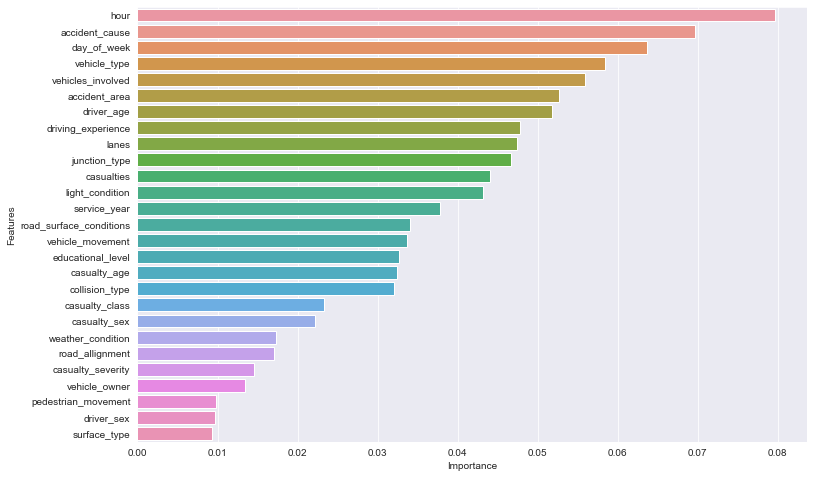

In [203]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = rf.feature_importances_
plt.figure(figsize=(12,8))
sns.barplot(data=df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance')

In [204]:
# selecting top 10 features
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['hour',
 'accident_cause',
 'day_of_week',
 'vehicle_type',
 'vehicles_involved',
 'accident_area',
 'driver_age',
 'driving_experience',
 'lanes',
 'junction_type']

In [205]:
df_top10 = df[top10]
df_top10

,hour,accident_cause,day_of_week,vehicle_type,vehicles_involved,accident_area,driver_age,driving_experience,lanes,junction_type
0,17,9,1,0,1,9,0,0,2,1
1,17,16,1,11,1,6,1,3,4,1
2,17,0,1,5,1,1,0,0,6,1
3,1,1,3,11,1,6,0,2,6,7
4,1,16,3,0,1,4,0,1,6,7
...,...,...,...,...,...,...,...,...,...,...
12311,16,10,6,4,1,5,1,1,4,1
12312,18,10,3,0,1,5,4,2,2,1
12313,13,1,3,1,0,5,2,2,2,1
12314,13,5,3,5,1,6,0,3,4,1


In [207]:
X = df_top10.copy()
X_train, X_test, y_train, y_test = train_test_split(df_top10, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 10) (3695, 10) (8621,) (3695,)


In [208]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [210]:
y_pred = rf.predict(X_test)

Accuracy = accuracy_score(y_test,y_pred)
Precision = precision_score(y_test,y_pred, average='weighted')
Recall = recall_score(y_test,y_pred, average='weighted')
F1_score = f1_score(y_test,y_pred, average='weighted')

In [211]:
print(f" Accuracy: {Accuracy}")
print(f" Precision: {Precision}")
print(f" Recall: {Recall}")
print(f" F1_score: {F1_score}")

 Accuracy: 0.8346414073071718
 Precision: 0.762446549391069
 Recall: 0.8346414073071718
 F1_score: 0.7699694752305829


## From the above, Random forest model gives the best metrics overall. Proceeding with this model deployment

In [212]:
import joblib

In [213]:
joblib.dump(rf, 'Baseline_RandomForest_final.joblib')

['Baseline_RandomForest_final.joblib']

In [214]:
import sys
print(sys.version)

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]


In [217]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.21.5
1.4.2
1.1.3


In [218]:
print(joblib.__version__)

1.1.0
